# The QQ (Normal) Plot
## A graphical method to check distribution assumptions

This is a practical tutorial on how to check assumptions about the distribution of data using QQ-Plots with Python.

## Introduction

In machine learning many statistical methods make various assumptions about our data. In least squares for instance we assume our error terms to be iid. and to have an expectation of zero. The zero expectation property is easy to verify by looking at the mean residuals and its quantiles. Verifying that our errors are iid. is not as easy and not part of this tutorial. There exists a lot of numerical and graphical tools (e.g. Tukey-Anscombe Plot) to verify this assumption.  
Somtimes it is mathematically convenient to assume that the errors are not only iid. but also normally distributed: $\epsilon_1, ..., \epsilon_n iid. \sim \mathcal{N}(0,\sigma^2)$. This is a strong assumption which needs to be verified. The QQ-Plot is an easy and convenient graphical method for checking such assumptions. (NOTE: "QQ-Plots" are often referred to as "Normal Plots" when we want to check weather data is generated by a normal distribution).

The idea behind the QQ plot is to plot the empirical quantiles against the theoretical quantiles of the assumed distribution. For the case where we assume our data to be $iid \sim \mathcal{N}(\mu,\sigma^2)$, we plot the empirical quantiles against the theoretical quantiles of the standard normal distribution: $\mathcal{N}(0,1)$. If the data was truly generated by an normal distribution $\mathcal{N}(\mu,\sigma^2)$ it should approximate a line with intercept $\mu$ and slope $\sigma$.

## Theoretical and Empirical Quantiles
For understanding the following demonstration of QQ plots on different datasets its useful to shortly refresh our knowledge about quantiles.

### Theoretical Quantile 
We will alsmost exclusively make assumptions about distributions with a contionus comulative distribution function (normal, t-distribution, etc.). Such functions are inverteable and the theoretical quantiles can be calculated by the inverse distribution function. For example the 0.5 quantile of such a distribution is definde by $q_{0.5}=F^{-1}(0.5)$. Therefor the probability of a rondom variable generated by $F$ beeing less than $q_{0.5}$ is equal to $0.5$ or in other words $q_{0.5}$ is the median of the distribution. QQ-Plots plot this quantiles against the empircal quantiles.

### Empirical (Sample) Quantile
Litrature provides no unique definition for an empircial quantile hence the empirical distribution function is not continuous and therefore not defined for every $p \in [0,1]$. For instance R provides nine different methods to calculate empirical quantiles (For interested readers: "Rob J. Hyndman and Yanan Fan: Sample Quantiles in Statistical Packages", The Amertican Statistician, Vol. 50, No. 4). For us it is sufficient to know that a emperical p-quantile is a value $x_p$ which distributes our data roughly at a ratio of $p$ to $1-p$) where $0\leq p\leq1$. Since 01 TODO

# QQ Plots in Python


In [118]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import scipy.stats as stats
pylab.rcParams['figure.figsize'] = (5,5)
np.random.seed(3212967995)

Lets start with an easy example: generating 50 points from a normal distribution. Then we plot the points agaginst the quantiles of the normal distribution. 

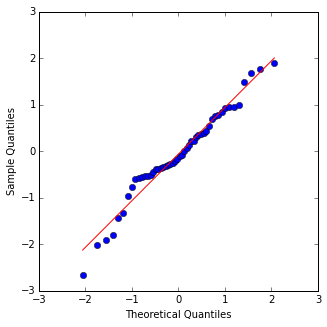

In [119]:
data = np.random.normal(0,1, 50)
sm.qqplot(data,stats.norm,line="r");

As we can see the points lie rughly one one line. QQ-Plots are strongly dependend on the size of our data. The following example draws the QQ-Plot for different sample sizes (10, 25, 100, 1000). As expected the more data we have the easier it is to judge weather the data comes from a normal distribution or not.

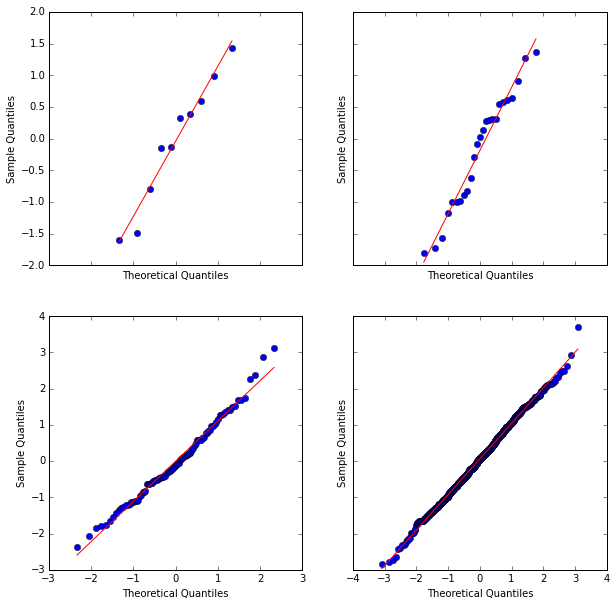

In [120]:
pylab.rcParams['figure.figsize'] = (10,10)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
sm.qqplot(np.random.normal(0,1,10),stats.norm,line="r", ax=ax1);
sm.qqplot(np.random.normal(0,1,25),stats.norm,line="r", ax=ax2);
sm.qqplot(np.random.normal(0,1,100),stats.norm,line="r", ax=ax3);
sm.qqplot(np.random.normal(0,1,1000),stats.norm,line="r", ax=ax4);

So far we generated our data by a standard normal distribution $\mathcal{N}(0,1)$. As mentioned before when we plot data generated by a arbitrary normal $\mathcal{N}(\mu,\sigma^2)$ against the theoretical quantiles of the standard normal the points will still approximate a line with intercept $\mu$ and slope $\sigma$.
We demonstrate this in the following we plot: 50 datapoints are gerated by $\mathcal{N}(0,1)$,  $\mathcal{N}(2,1)$, $\mathcal{N}(0,0.5)$ and $ \mathcal{N}(2,0.5)$ distributions and plotted against the theretical quantiles of the standard normal. The intercepts of our lines are approximately $0$, $2$, $0$ and $2$ wheras the slope is approximately $1$, $1$, $0.5$ and $0.5$ as expected:

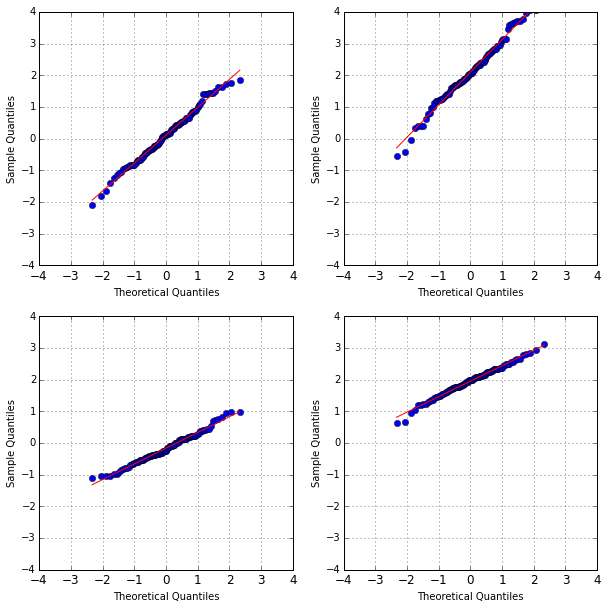

In [121]:
def drawQQForNormal(mu, sigma, diagramPosition,ax1=None):
    if ax1==None: 
        ax1 = plt.subplot(diagramPosition)
    else:
        ax1 = plt.subplot(diagramPosition,sharex=ax1)
    sm.qqplot(np.random.normal(mu,sigma,100),stats.norm,line="r", ax=ax1);
    plt.grid(True)
    plt.axis((-4,4,-4,4))
    plt.setp(ax1.get_xticklabels(), fontsize=12)
    return ax1
    
ax1 = drawQQForNormal(0,1,221)
drawQQForNormal(2,1,222,ax1)
drawQQForNormal(0,0.5,223,ax1)
drawQQForNormal(2,0.5,224,ax1)